Exploratory Data Analysis

In [1]:
import seaborn as sns
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from adjustText import adjust_text
from datasets import load_dataset

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


df_DA_US = df[(df['job_title_short']=='Data Analyst')& (df['job_country']=='United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])


In [15]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

In [16]:
df_plot

,count
job_location,
Anywhere,568
"New York, NY",327
"Chicago, IL",130
"Atlanta, GA",117
"Washington, DC",107
"Tampa, FL",97
"Los Angeles, CA",97
"Dallas, TX",82
"San Francisco, CA",75


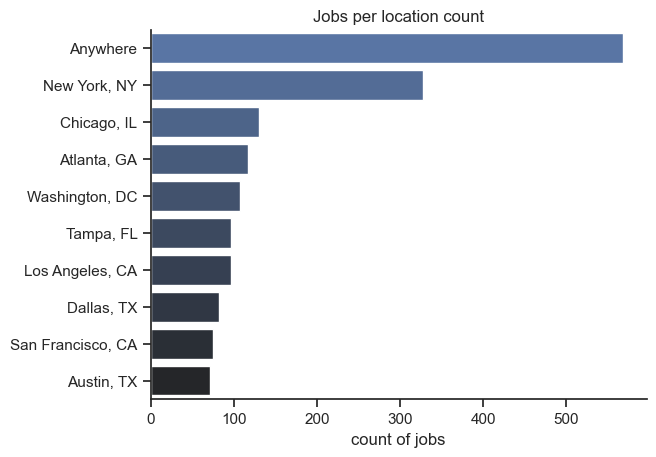

In [33]:
sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, y='job_location', x='count', hue = 'job_location', palette='dark:b_r')
sns.despine()
plt.title('Jobs per location count')
plt.xlabel('count of jobs')
plt.ylabel('')
plt.show()


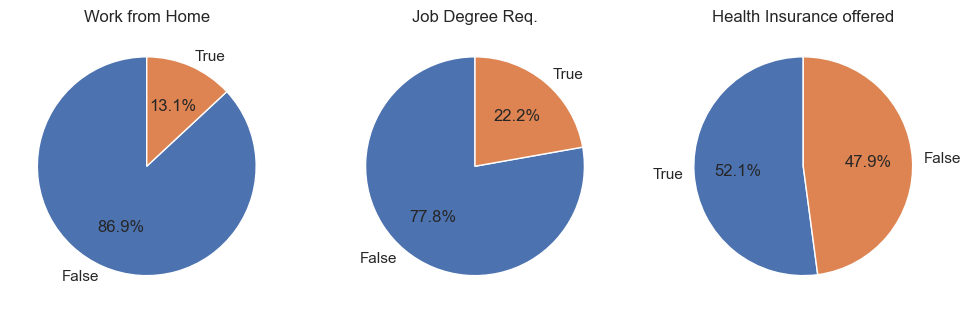

In [35]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,5)

dict_column = {
    'job_work_from_home':'Work from Home', 'job_no_degree_mention':'Job Degree Req.', 'job_health_insurance':'Health Insurance offered'
}

dict_column

for i, (column, title) in enumerate(dict_column.items()):
    #print(i, Column, title)
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=df_DA_US[column].value_counts().index)
    ax[i].set_title(title)
    ax[i].set_ylabel('')
plt.show()

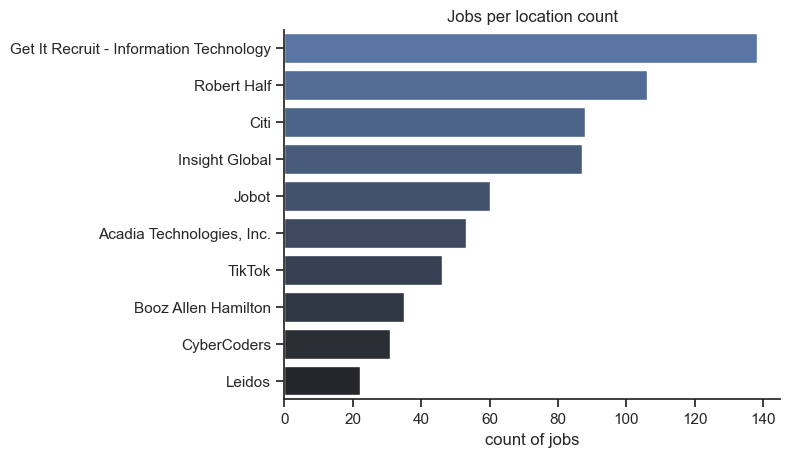

In [39]:
df_plotcomp = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style = 'ticks')
sns.barplot(data = df_plotcomp, y='company_name', x='count', hue = 'company_name', palette='dark:b_r')
sns.despine()
plt.title('Jobs per location count')
plt.xlabel('count of jobs')
plt.ylabel('')
plt.show()


In [40]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


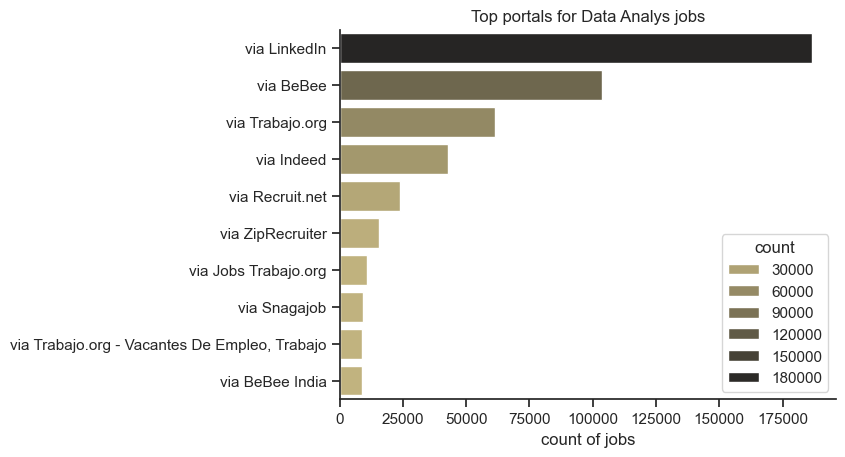

In [52]:
df_portal = df['job_via'].value_counts().head(10).copy().to_frame()
df_portal
sns.barplot(df_portal, x='count', y='job_via', hue = 'count', palette='dark:y_r',legend=True)
sns.despine()
sns.set_theme(style='ticks')
plt.title('Top portals for Data Analys jobs')
plt.xlabel('count of jobs')
plt.ylabel('')
plt.show()